## Part 1

### 1. 

In [18]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from   mpl_toolkits.mplot3d import Axes3D
from   scipy.stats import multivariate_normal
from sklearn import metrics 
from sklearn.utils import shuffle
import random
from sklearn.decomposition import PCA
import math

In [19]:
data=pd.read_csv('transfusion.data')
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [20]:
#Shuffling the data

Xmat=data.to_numpy();

X_shuffle=shuffle(Xmat);

X=X_shuffle[:,[0,1,2,3]];
Y=X_shuffle[:,4];
#print(Y)
#print(X)

In [55]:
# Using Principal Component Analysis to reduce the dimensions of data set for our learning model of online K means

pca = PCA(n_components=1)
F=pca.fit_transform(X)
U=F.flat
M=[U[200],U[550]];

# Using the pseudo code from text book

for i in range(2):
    n=0;
    A=[0];
    for j in range(10000):
        n=n+1;
        p=np.argmin((U-M[i]));
        M[i]= M[i]+((1/n)*((U[p]-M[i])));
        #print(M[i])
        #print(A);
        A.append(M[i])
        conv=abs(A[-1]-A[-2]);
        if (conv<0.001):
            break
    #print(n)
    print()

print("Number of iterations:")     
print(n)



Number of iterations:
2


### 2.

Clustering can be conducted with any number of clusters, even for a problem involving two classes, so the cluster index is not necessarily representative of the classes. A clustering algorithm is used to group nearby neighbors based on their centroid positions.

### 3.

<IPython.core.display.Javascript object>


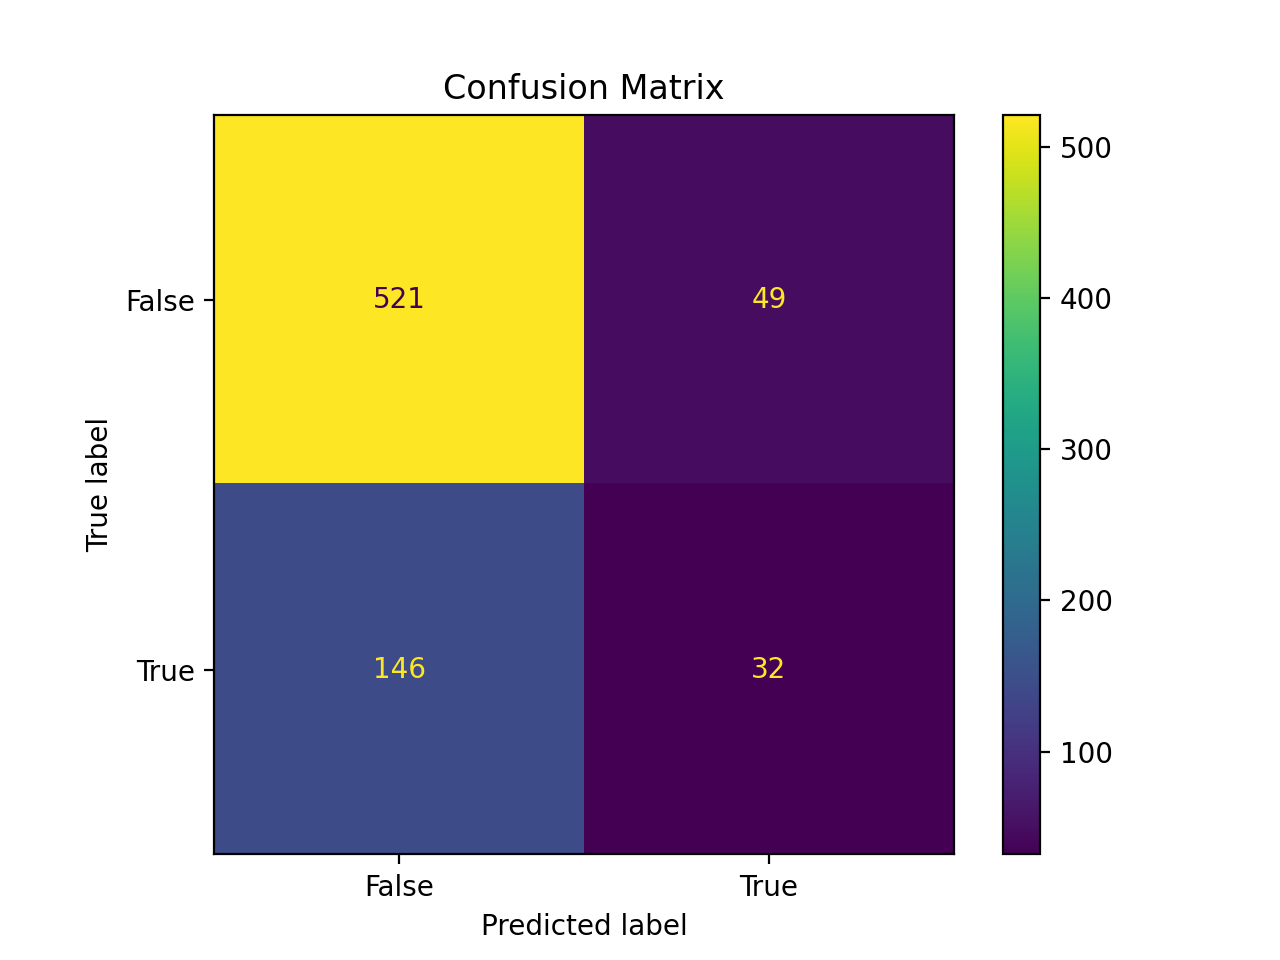

Accuracy: 0.7393048128342246 



In [22]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=2).fit(X)
cluster_centers= kmeans.cluster_centers_
K_Y_Pred=kmeans.predict(X)

confusion_matrix = metrics.confusion_matrix(Y,K_Y_Pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix")
plt.show()
Accuracy=accuracy_score(Y,K_Y_Pred)
print("Accuracy:",Accuracy,"\n")

### 4. 

Online k-means and k-means are very similar. Online K-means provide the advantage of allowing the model to be updated as new data is received.

Using online k-means is appropriate when you expect the data to be received one by one (or perhaps in chunks). This allows you to update your model as you get more information about it. Using this method has the disadvantage of relying on the order in which the data is received.

## Part 2

### 1.

<IPython.core.display.Javascript object>


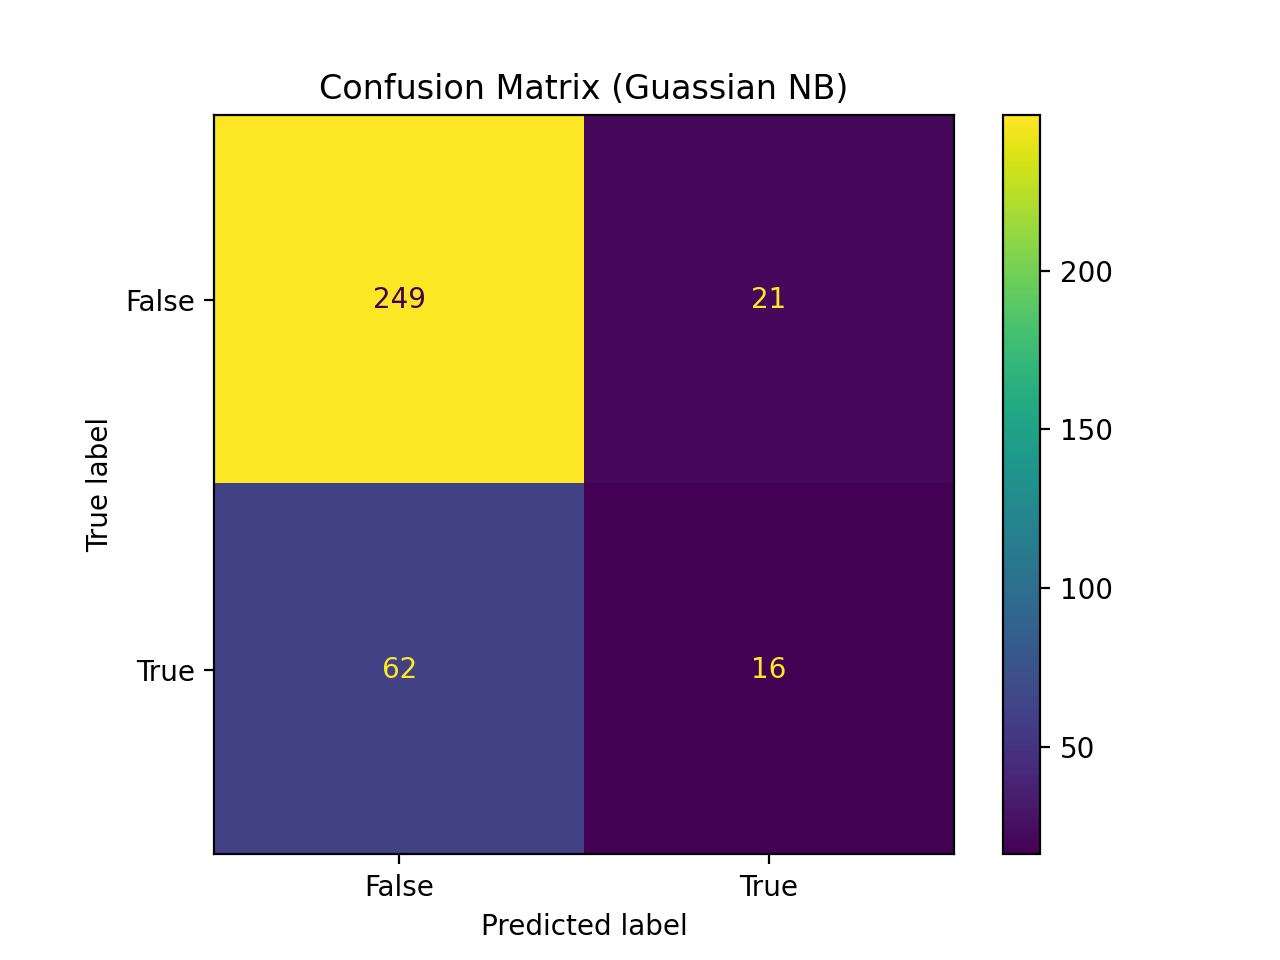

Accuracy(Guassian NB): 0.7614942528735632 



In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.metrics import accuracy_score

Xshuf=shuffle(Xmat);


Train=Xshuf[0:400,:];
Test=Xshuf[400:748,:];

Train_X=Train[:,[0,1,2,3]];
Train_Y=Train[:,4];

Test_X=Test[:,[0,1,2,3]];
Test_Y=Test[:,4];

gnb = GaussianNB()
y_pred = gnb.fit(Train_X, Train_Y).predict(Test_X)

confusion_matrix_1 = metrics.confusion_matrix(Test_Y,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_1, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix (Guassian NB)")
plt.show()
Accuracy=accuracy_score(Test_Y,y_pred)
print("Accuracy(Guassian NB):",Accuracy,"\n")

### 2.

<IPython.core.display.Javascript object>


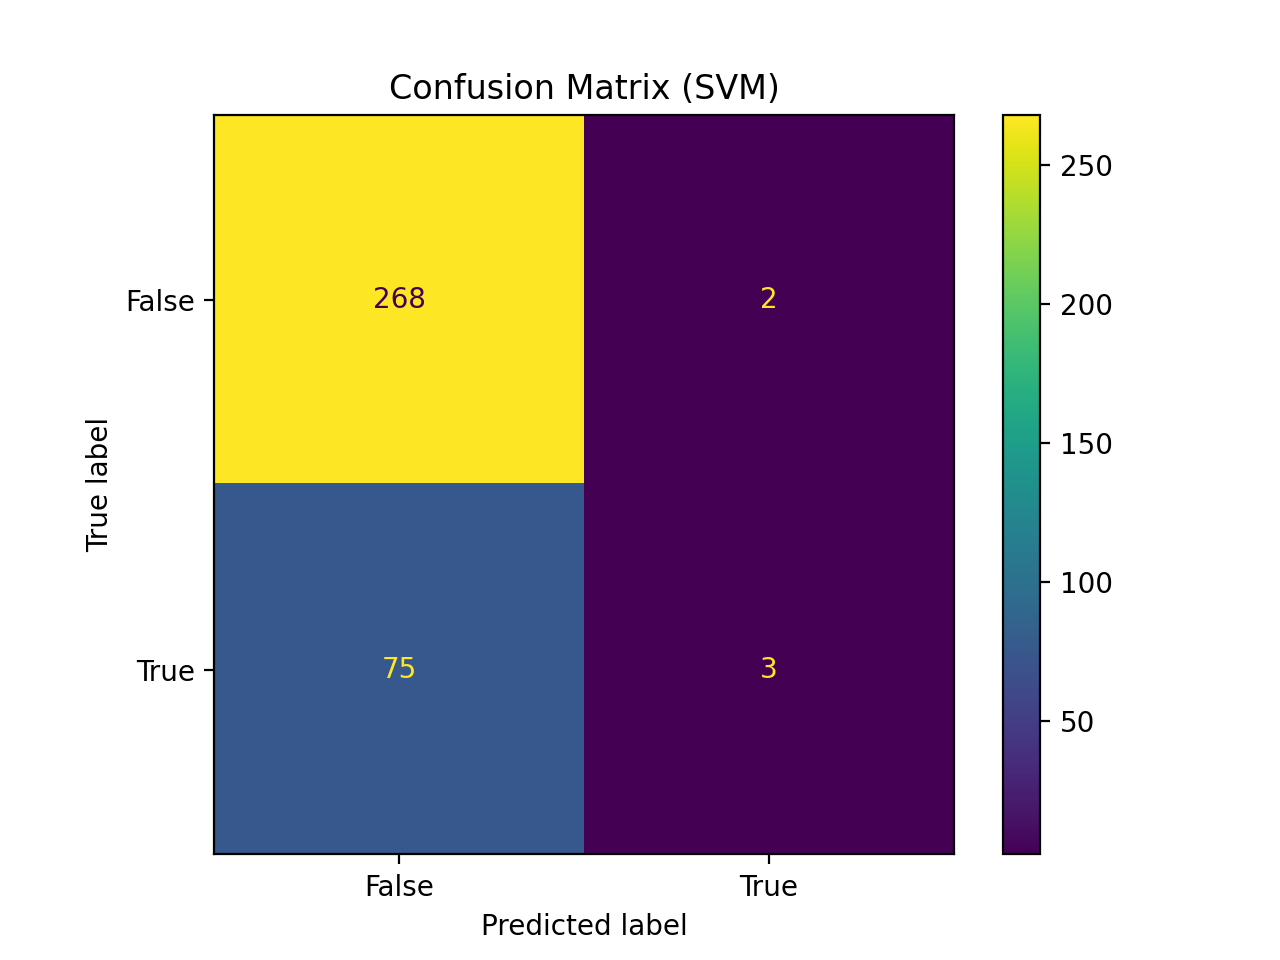

Accuracy(SVM): 0.7787356321839081 



In [16]:
from sklearn.svm import SVC


svm=SVC(kernel='rbf');
svm.fit(Train_X, Train_Y);
svm_pred= svm.predict(Test_X);
confusion_matrix_2 = metrics.confusion_matrix(Test_Y,svm_pred)

cm_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2, display_labels = [False, True])

cm_display_2.plot()
plt.title("Confusion Matrix (SVM)")
plt.show()
Accuracy_1=accuracy_score(Test_Y,svm_pred)
print("Accuracy(SVM):",Accuracy_1,"\n")

### 3.

According to the above accuracy values of Guassian NB (0.76149) and of SVM (0.77874), SVM provided higher accuracy for the same training and testing sets.

### 4. 

Logistic regression uses the logistic sigmoid function to model the probability of belonging to a particular class. A logistic regression model is designed to maximize the likelihood of the observed data given the parameters (coefficients) of the model. The goal of SVM, on the other hand, is to find the hyperplane that maximally separates the data points of different classes. The objective is to maximize the margin, which is the distance between the hyperplane and the nearest data points to each class.

## Part 3

### 1. 

<IPython.core.display.Javascript object>


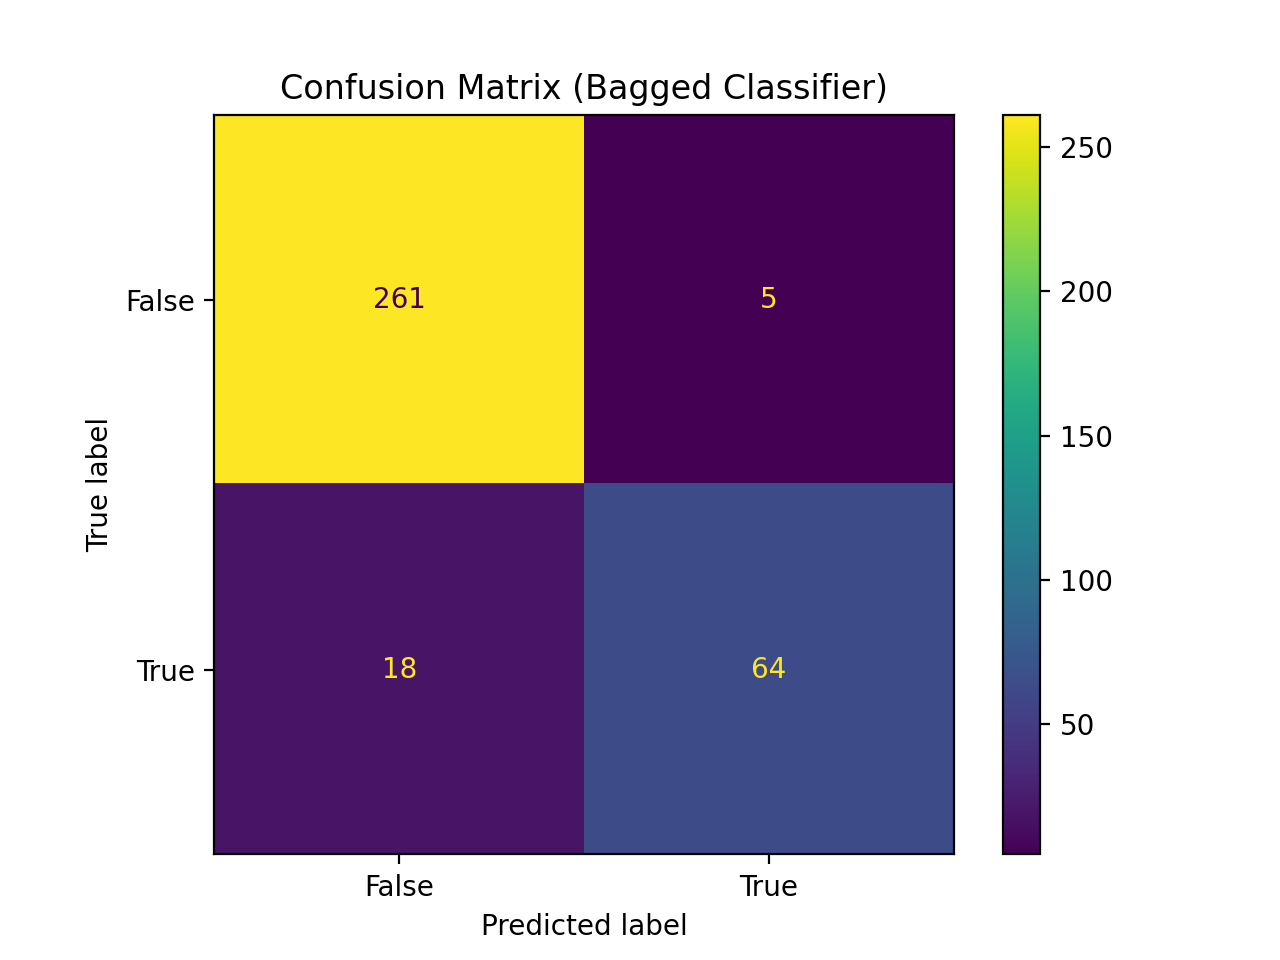

Accuracy(Bagged Classifier): 0.9339080459770115 



<IPython.core.display.Javascript object>


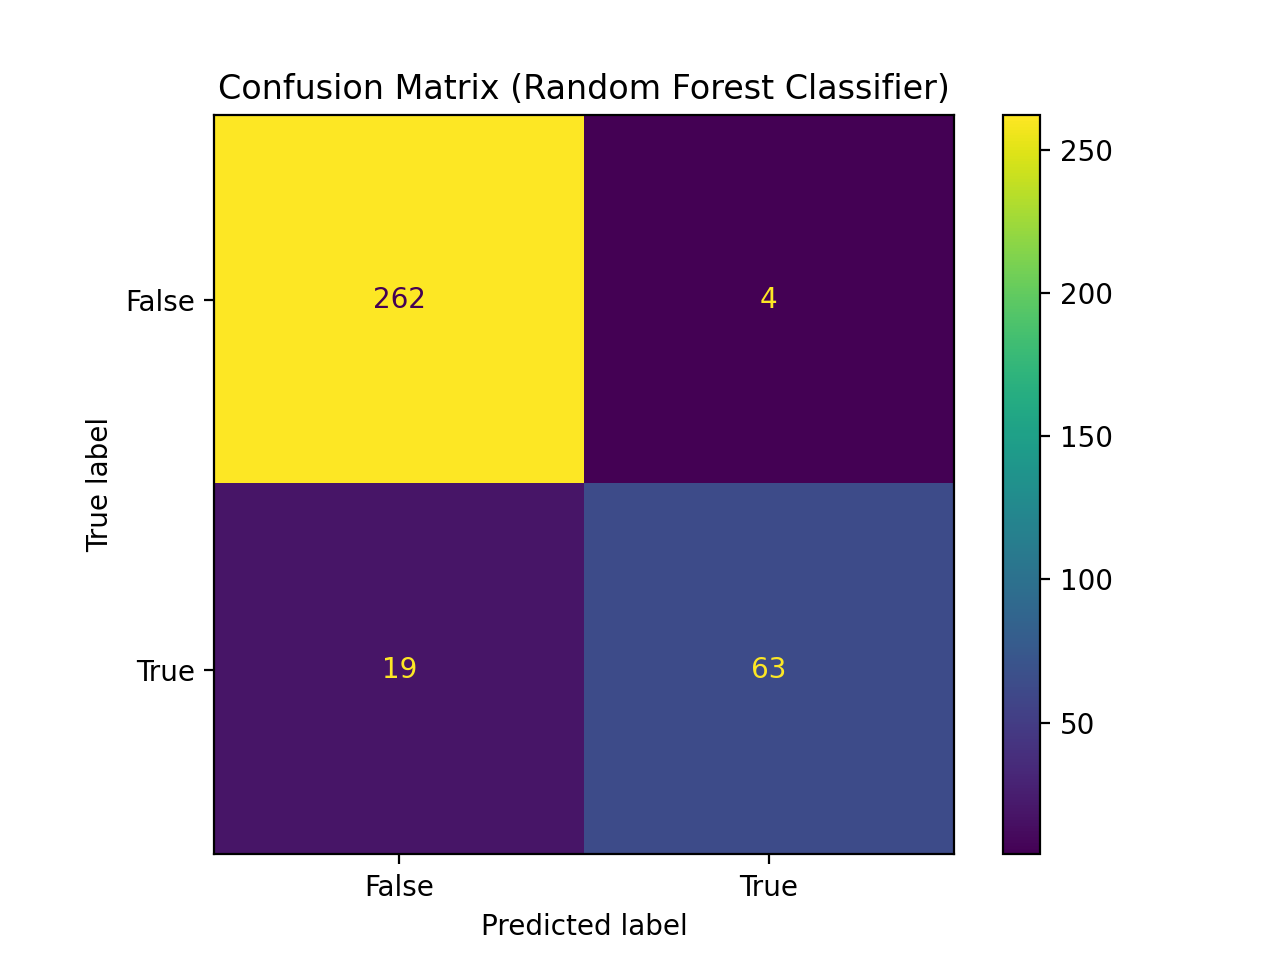

Accuracy(Random Forest Classifier): 0.9339080459770115 



In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

Xshuf=shuffle(Xmat);


Train=Xshuf[0:400,:];
Test=Xshuf[400:748,:];

Train_X=Train[:,[0,1,2,3]];
Train_Y=Train[:,4];

Test_X=Test[:,[0,1,2,3]];
Test_Y=Test[:,4];


bc = BaggingClassifier(n_estimators=500).fit(Test_X, Test_Y)
bc_pred=bc.predict(Test_X)
confusion_matrix_3 = metrics.confusion_matrix(Test_Y,bc_pred)

cm_display_3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_3, display_labels = [False, True])

cm_display_3.plot()
plt.title("Confusion Matrix (Bagged Classifier)")
plt.show()
Accuracy_2=accuracy_score(Test_Y,bc_pred)
print("Accuracy(Bagged Classifier):",Accuracy_2,"\n")


rfc = RandomForestClassifier(n_estimators=500).fit(Test_X, Test_Y)
rfc_pred=rfc.predict(Test_X)
confusion_matrix_4 = metrics.confusion_matrix(Test_Y,rfc_pred)

cm_display_4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_4, display_labels = [False, True])

cm_display_4.plot()
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()
Accuracy_rfc=accuracy_score(Test_Y,rfc_pred)
print("Accuracy(Random Forest Classifier):",Accuracy_rfc,"\n")

### 2.

<IPython.core.display.Javascript object>


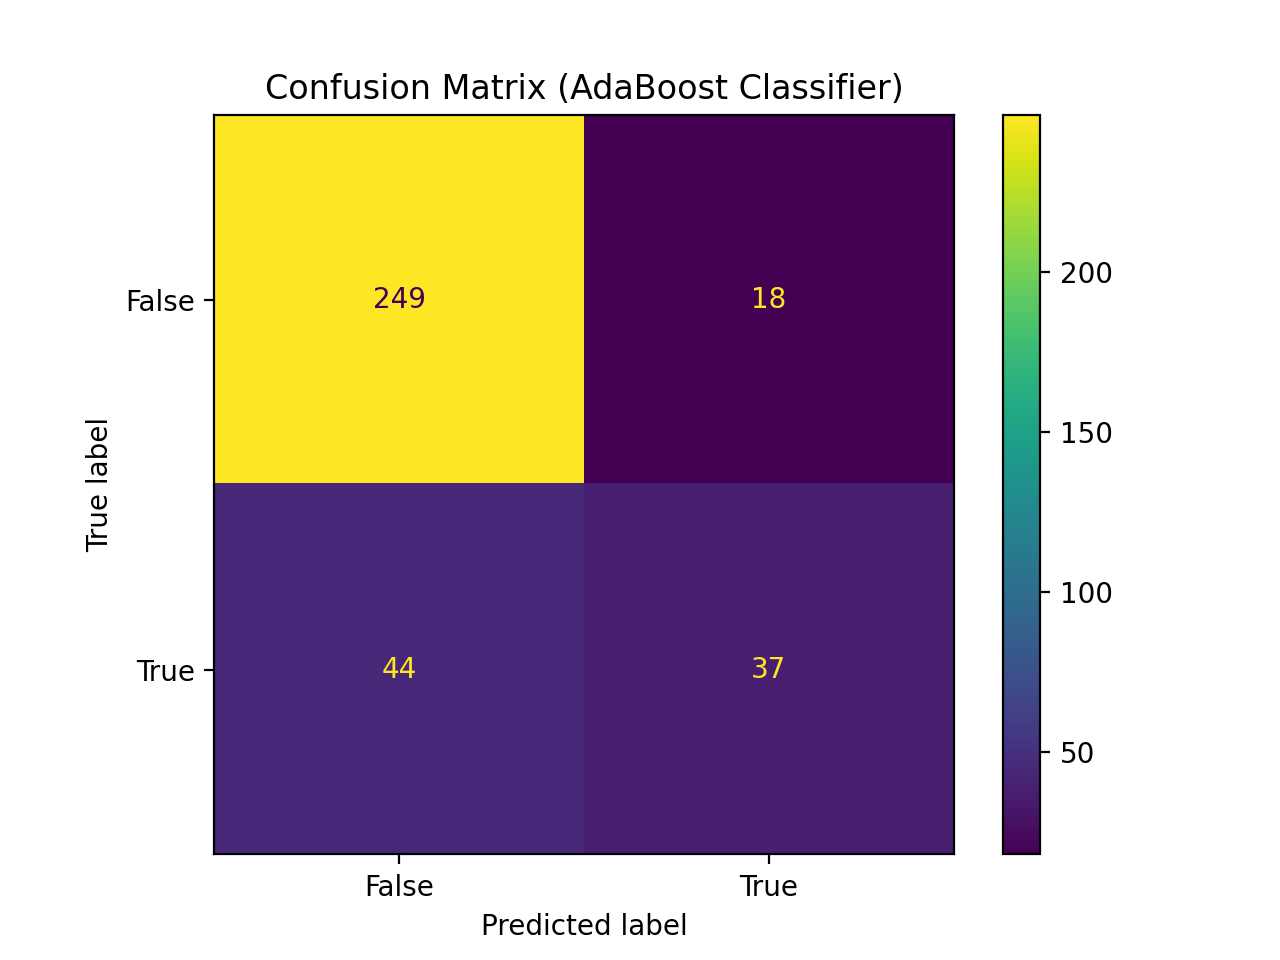

Accuracy(AdaBoost Classifier): 0.8218390804597702 



In [11]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=500).fit(Test_X, Test_Y)
abc_pred= abc.predict(Test_X)
confusion_matrix_A = metrics.confusion_matrix(Test_Y,abc_pred)

cm_display_A = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_A, display_labels = [False, True])

cm_display_A.plot()
plt.title("Confusion Matrix (AdaBoost Classifier)")
plt.show()
Accuracy_A=accuracy_score(Test_Y,abc_pred)
print("Accuracy(AdaBoost Classifier):",Accuracy_A,"\n")

### 3.

A bagged classification tree is used when our goal is to reduce the variance of a decision tree. It is also called bootstrap aggregation. Random forest is an extension of bagging. Rather than growing trees based on all features, it takes a random selection of features as well as a random subset of data. It is called a random forest when you have many random trees.

### 4. 

Bagging is a technique for reducing prediction variance by producing additional data for training from a dataset by combining repetitions with combinations to create multi-sets of the original data.

Boosting is an iterative strategy for adjusting an observation's weight based on its previous classification. It attempts to increase the weight of an observation if it was erroneously categorized. Boosting creates decent predictive models in general.

## Part 4

### 1. 

In [33]:
Xshuf=shuffle(Xmat);

Train=Xshuf[0:400,:];
Test=Xshuf[400:748,:];

DepVar_Train=Train[:,1];
IndepVar_Train=Train[:,[0,2,3]];

DepVar_Test=Test[:,1];
IndepVar_Test=Test[:,[0,2,3]];

Mean=np.array(IndepVar_Train.mean(axis=0))
Covariance=np.cov(IndepVar_Train)

print("Mean: ",Mean)
print()
print("Covariance: ",Covariance)

Mean:  [   9.7375 1458.75     36.2975]

Covariance:  [[  18565.33333333   18014.66666667   96445.33333333 ...   39018.66666667
   233168.           97743.33333333]
 [  18014.66666667   17480.33333333   93584.66666667 ...   37861.33333333
   226252.           94844.16666667]
 [  96445.33333333   93584.66666667  501106.33333333 ...  202698.66666667
  1211594.          507808.83333333]
 ...
 [  39018.66666667   37861.33333333  202698.66666667 ...   82005.33333333
   490048.          205426.66666667]
 [ 233168.          226252.         1211594.         ...  490048.
  2929588.         1227743.        ]
 [  97743.33333333   94844.16666667  507808.83333333 ...  205426.66666667
  1227743.          514622.33333333]]


### 2.

In [34]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


kernel = DotProduct() + WhiteKernel();
gpr = GaussianProcessRegressor(kernel=kernel).fit(IndepVar_Train, DepVar_Train);

Dep_pred=gpr.predict(IndepVar_Test);
#print(DepVar_Test,Dep_pred)

MSE=mean_squared_error(DepVar_Test,Dep_pred)


print("Mean Squared Error (Gaussian Process Regression):",MSE)

Mean Squared Error (Gaussian Process Regression): 5.717651267154441e-27


### 3.

In [35]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(IndepVar_Train, DepVar_Train)

Lin_Reg_Score=reg.score(IndepVar_Train, DepVar_Train)

Lin_Reg_Coeff=reg.coef_

Lin_Reg_Intercept=reg.intercept_

reg_predict=reg.predict(IndepVar_Test)

MSE_Linreg=mean_squared_error(DepVar_Test,reg_predict)

print("Mean Squared Error (Linear Regression):",MSE_Linreg)
print("Linear Regression Coefficient:" ,Lin_Reg_Coeff)
print("Linear Regression Intercept:", Lin_Reg_Intercept)

Mean Squared Error (Linear Regression): 2.7810548822916024e-28
Linear Regression Coefficient: [3.41969445e-16 4.00000000e-03 2.99068585e-17]
Linear Regression Intercept: -2.220446049250313e-14


### 4.

Gaussian process regression doesn't have to perfectly interpolate between points. The underlying assumption is that the variable is spatially auto-correlated. It means that knowledge of the outcome at some point will give you information at the nearest location.

Gaussian process regression is not a parametric method. Parametric approaches distill knowledge from training data into numerical values. For linear regression, this is just two parameters, both the slope and the intercept; whereas other approaches like neural networks may have a ton of parameters.

Linear regression assumes that the formula (The formal equation for linear data is: y = mx + b) is accurate and finds the best fitting values in the process for “m” and “b” to produce the optimal line passing through your data.